In [1]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# A função `make_blobs` gera clusters com amostras retiradas de distribuições Gaussianas.
from sklearn.datasets import make_blobs

In [2]:
# Define a seed.
seed = 42
# Reset the PN sequence generator.
np.random.seed(seed)
random.seed(seed)

### Gerando os dados de 2 classes.

In [3]:
# Number of examples.
N = 1000

# Create a 2-class dataset for classification with the specified centers.
centers = [[-5.0, 0], [0, 5.0]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

print('Dimensão de X:', X.shape)
print('Dimensão de y:', y.shape)

Dimensão de X: (1000, 2)
Dimensão de y: (1000,)


### Plotando as 2 classes.

#### Qual o formato mais apropriado para a função discriminante, $g(x)$?

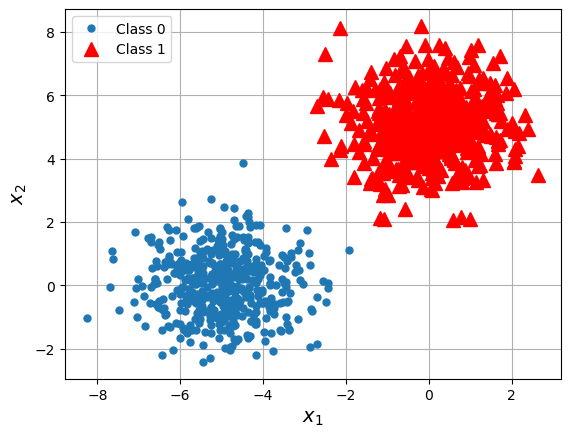

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Definindo algumas funções úteis.

In [5]:
def classifier(X, a):
    '''Função que realiza a classificação. Implementa a função hipótese de classificação.'''
    # Função discriminante.
    g = X.dot(a)
    # Função de limiar de decisão rígido. A saída será igual a '1' quando g = 0.
    h = np.heaviside(g, 1.0)
    return h

def error_function(X, a, y):
    '''Função para cálculo do erro médio de classificação.'''
    h = classifier(X, a)
    error = 0.0
    for i in range(0, len(y)):
        error += np.power(y[i] - h[i], 2.0)
    return error/len(y)

def accuracy(y_pred, y):
    '''Função para cálculo da acurácia do classificador.'''
    acc = 0
    for i in range(len(y)):
        if(y[i]==y_pred[i]):
            acc += 1
    return acc/len(y)

def train(X_train, y_train, X_test, y_test, alpha, numEpochs):
    '''Treinamento do classificador com limiar de decisão rígido.'''

    # Reshaping into column vectors.
    y_train = y_train.reshape(len(y_train), 1)
    y_test = y_test.reshape(len(y_test), 1)    
    
    # Random initialization of parameters.
    a = np.random.randn(X_train.shape[1], 1)

    # Create array for storing error values.
    Jgd = np.zeros(numEpochs*len(y_train)+1)
    Jgd_v = np.zeros(numEpochs*len(y_train)+1)

    # Calculate initial error.
    Jgd[0] = error_function(X_train, a, y_train)
    Jgd_v[0] = error_function(X_test, a, y_test)

    # Batch gradient-descent loop.
    minimum_val_error = float("inf")
    iteration = 0
    epoch = 0
    N = len(y_train)
    while epoch < numEpochs:
        
        # Shuffle the whole dataset before every epoch.
        sdsi = random.sample(range(0, N), N)           

        for idx in range(0, N):
            # Draw a random pair of training samples.
            rndidx = sdsi[idx]
            X = X_train[rndidx,:].reshape(1, X_train.shape[1])
            y = y_train[rndidx].reshape(1, 1)
            
            # Update weights.
            update = X.T.dot(y - classifier(X, a))
            a = a + alpha * update

            # Calculating training and validation errors.
            Jgd[iteration+1] = error_function(X_train, a, y_train)
            Jgd_v[iteration+1] = error_function(X_test, a, y_test)

            # Early-stop: store weights for the smallest error ever.
            if(Jgd_v[iteration+1] < minimum_val_error):
                minimum_val_error = Jgd_v[iteration+1]
                a_min = a

            # Increment iteration.
            iteration += 1

        # Increment epoch.
        epoch += 1
    
    # Return all variables.
    return Jgd, Jgd_v, iteration, a_min, minimum_val_error, a

### Dividindo os dados em conjuntos de treinamento e validação.

In [6]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (700, 2)
X_test: (300, 2)
y_train: (700,)
y_test: (300,)


### Alterando as matrizes de atributos de treinamento e validação para que elas implementem o formato apropriado da função discriminante.

Depois de analisarmos a figura com a disposição das classes, podemos concluir que o formato mais apropriado é o de uma **reta**, conforme dado pela equação abaixo.

$$g(x) = a_0 + a_1x_1 + a_2x_2,$$

onde $a_0$ é o peso de bias e o atributo associado a ele, $x_0$, é sempre feito igual a 1.

Em forma matricial ela é definida como

$$g(x) = \textbf{Xa},$$

onde $\textbf{a}$ e $\textbf{X}$ são um vetor e uma matriz, respectivamente.

In [7]:
# Add bias to feature matrix.
X_train = np.c_[np.ones((len(y_train), 1)), X_train]

# Add bias to feature matrix.
X_test = np.c_[np.ones((len(y_test), 1)), X_test]

In [8]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (700, 3)
X_test: (300, 3)


### Treinando o classificador.

In [9]:
# Learning rate.
alpha = 0.1

# Maximum number of iterations.
numEpochs = 2

Jgd, Jgd_v, iteration, a_min, minimum_val_error, a = train(X_train, y_train, X_test, y_test, alpha, numEpochs)

print('Minimum validation error:', minimum_val_error)

y_pred = classifier(X_test, a)
print('Accuracy:', accuracy(y_pred, y_test))

Minimum validation error: 0.0
Accuracy: 1.0


### Plotando os erros.

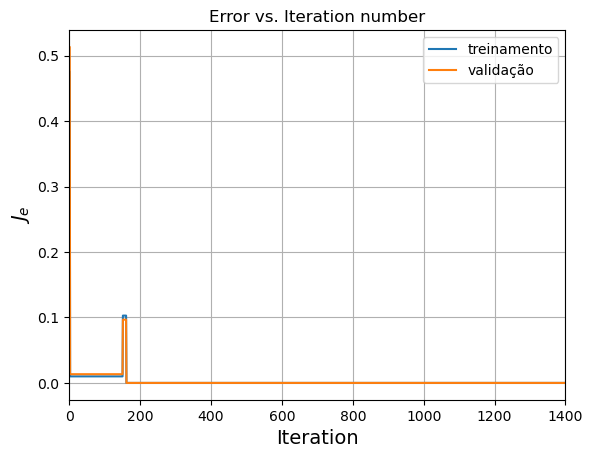

In [10]:
plt.figure()
plt.plot(np.arange(0, iteration), Jgd[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
plt.xlim((0, iteration))
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number')
plt.legend()
plt.grid()
plt.show()

### Plotando as regiões de decisão.

**OBS:** Notem que a matriz de atributos criada para plotarmos as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

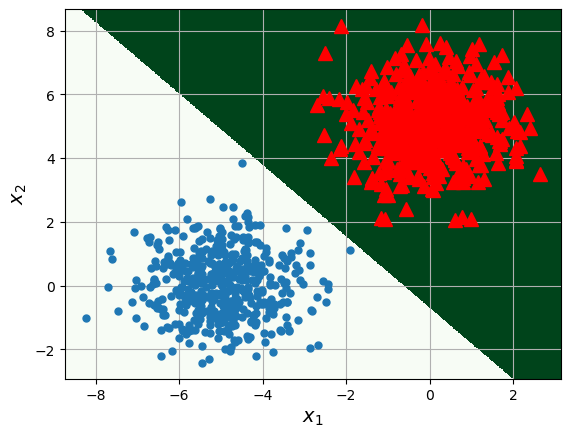

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
# O meshgrid cria uma combinação de pontos (valores) entre os intervalos definidos para plotar as regiões de decisão.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also have the same shape 
# as the one created for the training.
attribute_matrix = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()]

Z = classifier(attribute_matrix, a)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.grid()

plt.show()

### Imprimindo os pesos encontrados.

In [12]:
print('a0:', a[0, 0])
print('a1:', a[1, 0])
print('a2:', a[2, 0])

a0: 0.3967141530112327
a1: 0.6384082095101224
a2: 0.5700146031157893
